In [2]:
# Import essential libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For visualizing data distributions
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For data normalization
from tensorflow.keras.models import Model  # For building the Autoencoder model
from tensorflow.keras.layers import Input, Dense  # Layers used to define the Autoencoder structure
from tensorflow.keras.optimizers import Adam  # Optimizer for compiling the model

In [4]:
# Load the credit card dataset
# Assuming the dataset is a CSV file named 'creditcard.csv' in the current directory
df = pd.read_csv('../datasets/CreditCard/creditcard.csv')

# Show the first few rows to understand the data structure
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Separate the 'Class' column (which indicates if a transaction is fraudulent) from the feature columns
X = df.drop('Class', axis=1)  # Features for training the model
y = df['Class']  # Labels (0 = normal, 1 = fraud)

# Normalize the feature data to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data to have a mean of 0 and standard deviation of 1

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# Define the input shape based on the number of features
input_dim = X_train.shape[1]

# Define the structure of the Autoencoder
input_layer = Input(shape=(input_dim,))  # Input layer
encoded = Dense(16, activation='relu')(input_layer)  # Encoder layer (reduce dimension)
encoded = Dense(8, activation='relu')(encoded)  # Bottleneck layer (compressed representation)
decoded = Dense(16, activation='relu')(encoded)  # Decoder layer (re-expand the data)
output_layer = Dense(input_dim, activation='linear')(decoded)  # Output layer to reconstruct the input

# Build the model
autoencoder = Model(inputs=input_layer, outputs=output_layer)


In [7]:
# Compile the Autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print model summary for a quick look at the structure
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 30)                510       
                                                                 
Total params: 1,286
Trainable params: 1,286
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the Autoencoder only on normal transactions (Class = 0) to learn the "normal" pattern
X_train_normal = X_train[y_train == 0]

# Fit the model with early stopping to avoid overfitting
history = autoencoder.fit(
    X_train_normal, X_train_normal,  # Use the same data for input and output
    epochs=10,  # Number of epochs
    batch_size=32,  # Mini-batch size
    validation_split=0.2,  # Use 20% of the training data for validation
    shuffle=True  # Shuffle the data before each epoch
)

Epoch 1/10
5687/5687 [==============================] - 33s 6ms/step - loss: 0.4725 - val_loss: 0.4757
Epoch 2/10
5687/5687 [==============================] - 33s 6ms/step - loss: 0.4729 - val_loss: 0.4755
Epoch 3/10
5687/5687 [==============================] - 28s 5ms/step - loss: 0.4722 - val_loss: 0.4748
Epoch 4/10
5687/5687 [==============================] - 24s 4ms/step - loss: 0.4728 - val_loss: 0.4813
Epoch 5/10
5687/5687 [==============================] - 25s 4ms/step - loss: 0.4717 - val_loss: 0.4769
Epoch 6/10
5687/5687 [==============================] - 31s 5ms/step - loss: 0.4720 - val_loss: 0.4754
Epoch 7/10
5687/5687 [==============================] - 33s 6ms/step - loss: 0.4712 - val_loss: 0.4759
Epoch 8/10
5687/5687 [==============================] - 32s 6ms/step - loss: 0.4718 - val_loss: 0.4745
Epoch 9/10
5687/5687 [==============================] - 32s 6ms/step - loss: 0.4727 - val_loss: 0.4743
Epoch 10/10
5687/5687 [==============================] - 32s 6ms/step - l

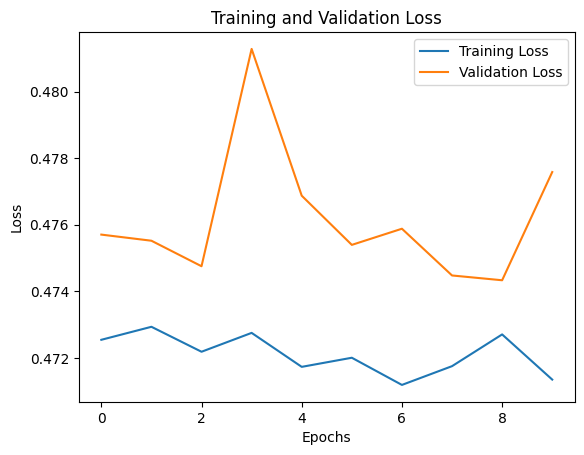

In [10]:
# Plot the training and validation loss to monitor model performance
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
# Predict on the test set to calculate reconstruction errors
X_test_pred = autoencoder.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the original and reconstructed data
reconstruction_error = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Define a threshold for anomaly detection based on the reconstruction error
threshold = np.percentile(reconstruction_error, 95)  # Set threshold at the 95th percentile

# Classify transactions as anomalies if their reconstruction error exceeds the threshold
y_pred = [1 if error > threshold else 0 for error in reconstruction_error]

1781/1781 [==============================] - 3s 2ms/step
